#**Data Preparation**

###**Load Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df=pd.read_csv("suicide_experiment.csv") # Load dataset
df.head()

,year,sex,age,suicides/100k pop,HDI for year,gdp_per_capita ($),generation
0,1987,male,15-24 years,6.71,0.793666,796.0,Generation X
1,1987,male,35-54 years,5.19,0.793666,796.0,Silent
2,1987,female,15-24 years,4.83,0.793666,796.0,Generation X
3,1987,male,75+ years,4.59,0.793666,796.0,G.I. Generation
4,1987,male,25-34 years,3.28,0.793666,796.0,Boomers


###**Discretize dataset**

Discretize the 'suicides/100k pop' column into 'Suicide Risk Level (High / Low)' based on the median value

In [ ]:
median_suicides = df['suicides/100k pop'].median()

df['Suicide Risk Level'] = df['suicides/100k pop'].apply(lambda x: 'High' if x > median_suicides else 'Low')

print(f"Median 'suicides/100k pop': {median_suicides:.2f}")
display(df[['suicides/100k pop', 'Suicide Risk Level']].head())
display(df['Suicide Risk Level'].value_counts())
df.head()

Median 'suicides/100k pop': 4.29


,suicides/100k pop,Suicide Risk Level
0,6.71,High
1,5.19,High
2,4.83,High
3,4.59,High
4,3.28,Low


,count
Suicide Risk Level,
High,15878
Low,15878


,year,sex,age,suicides/100k pop,HDI for year,gdp_per_capita ($),generation,Suicide Risk Level
0,1987,male,15-24 years,6.71,0.793666,796.0,Generation X,High
1,1987,male,35-54 years,5.19,0.793666,796.0,Silent,High
2,1987,female,15-24 years,4.83,0.793666,796.0,Generation X,High
3,1987,male,75+ years,4.59,0.793666,796.0,G.I. Generation,High
4,1987,male,25-34 years,3.28,0.793666,796.0,Boomers,Low


### **Drop Unnecessary column**

- Sex, age, and generation were removed because the study focuses on macro-level, country-wide wellbeing
- suicides/100k pop column was dropped to prevent any data leakage

In [ ]:
df_exp = df.copy()
df_exp = df_exp.drop(['suicides/100k pop', 'sex', 'age', 'generation','year'],
                       axis=1)
df_exp.head()

,HDI for year,gdp_per_capita ($),Suicide Risk Level
0,0.793666,796.0,High
1,0.793666,796.0,High
2,0.793666,796.0,High
3,0.793666,796.0,High
4,0.793666,796.0,Low


#**Experiment**
- The dataset was split into 80–20 and 70–30 training–testing sets.
- The algorithms used were Decision Tree, Random Forest, Logistic Regression, Naive Bayes, KNN, SVM, XGBoost and MLPClassifier (ANN).
- The experiment will be evaluate using Accuracy and F1-Score




### **80-20 Split**
Dataset were split into 80% for train and 20% for test

In [ ]:
X = df_exp.drop('Suicide Risk Level', axis=1) # Features
y = df_exp['Suicide Risk Level'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (25404, 2)
X_test shape: (6352, 2)
y_train shape: (25404,)
y_test shape: (6352,)


###**Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

#encode y_train & y_test
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Instantiate and train decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print('Decision Tree Model Trained')

# Instantiate and train random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print('Random Forest Model Trained')

# Instantiate and train logistic regression
lr_model = LogisticRegression(random_state=42, solver='liblinear') # solver='liblinear' for small datasets and 'l1' regularization
lr_model.fit(X_train, y_train)
print('Logistic Regression Model Trained')

# Instantiate and train naive bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
print('Naive Bayes Model Trained')

# Instantiate and train k-nearest neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print('K-Nearest Neighbors Model Trained')

# Instantiate and train SVM classifier
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)
print('SVM Model Trained')

# Instantiate and train XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
print('XGBoost Model Trained')

# Instantiate and train Artificial Neural Network (ANN) - MLPClassifier
ann_model = MLPClassifier(random_state=42, max_iter=500) # Increased max_iter for convergence
ann_model.fit(X_train, y_train)
print('ANN Model Trained')

Decision Tree Model Trained
Random Forest Model Trained
Logistic Regression Model Trained
Naive Bayes Model Trained
K-Nearest Neighbors Model Trained
SVM Model Trained


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:56:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model Trained
ANN Model Trained


###**Evaluate**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

models = {
    'Desision Tree' : dt_model,
    'Random Forest' : rf_model,
    'Logistic Regression' : lr_model,
    'Naive Bayes' : nb_model,
    'KNN' : knn_model,
    'SVM' : svm_model,
    'XGBoost' : xgb_model,
    'ANN' : ann_model
}

all_results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    all_results.append({'Model': name, 'Accuracy': accuracy, 'F1-Score': f1})

results = pd.DataFrame(all_results) # Create DataFrame from the list of dictionaries

print('Model Evualuation Results: ')
print(results)

Model Evualuation Results: 
                 Model  Accuracy  F1-Score
0        Desision Tree  0.721505  0.693255
1        Random Forest  0.718986  0.699039
2  Logistic Regression  0.500000  0.000000
3          Naive Bayes  0.532903  0.624953
4                  KNN  0.703401  0.688389
5                  SVM  0.548646  0.531000
6              XGBoost  0.659320  0.613019
7                  ANN  0.497953  0.179573


### **70-30 Split**
Dataset were split into 70% for train and 30% for test

In [ ]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train_b shape: {X_train_b.shape}")
print(f"X_test_b shape: {X_test_b.shape}")
print(f"y_train_b shape: {y_train_b.shape}")
print(f"y_test_b shape: {y_test_b.shape}")

X_train_b shape: (22229, 2)
X_test_b shape: (9527, 2)
y_train_b shape: (22229,)
y_test_b shape: (9527,)


###**Model**

In [ ]:
#encode y_train & y_test
le = LabelEncoder()
y_train_b = le.fit_transform(y_train_b)
y_test_b = le.transform(y_test_b)

# Instantiate and train decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_b, y_train_b)
print('Decision Tree Model Trained')

# Instantiate and train random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_b, y_train_b)
print('Random Forest Model Trained')

# Instantiate and train logistic regression
lr_model = LogisticRegression(random_state=42, solver='liblinear') # solver='liblinear' for small datasets and 'l1' regularization
lr_model.fit(X_train_b, y_train_b)
print('Logistic Regression Model Trained')

# Instantiate and train naive bayes
nb_model = GaussianNB()
nb_model.fit(X_train_b, y_train_b)
print('Naive Bayes Model Trained')

# Instantiate and train k-nearest neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_b, y_train_b)
print('K-Nearest Neighbors Model Trained')

# Instantiate and train SVM classifier
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_b, y_train_b)
print('SVM Model Trained')

# Instantiate and train XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_b, y_train_b)
print('XGBoost Model Trained')

# Instantiate and train Artificial Neural Network (ANN) - MLPClassifier
ann_model = MLPClassifier(random_state=42, max_iter=500) # Increased max_iter for convergence
ann_model.fit(X_train_b, y_train_b)
print('ANN Model Trained')

Decision Tree Model Trained
Random Forest Model Trained
Logistic Regression Model Trained
Naive Bayes Model Trained
K-Nearest Neighbors Model Trained
SVM Model Trained
XGBoost Model Trained


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:16:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ANN Model Trained


### **Evaluate**

In [ ]:
models = {
    'Desision Tree' : dt_model,
    'Random Forest' : rf_model,
    'Logistic Regression' : lr_model,
    'Naive Bayes' : nb_model,
    'KNN' : knn_model,
    'SVM' : svm_model,
    'XGBoost' : xgb_model,
    'ANN' : ann_model
}

all_results = []

for name, model in models.items():
    y_pred_b = model.predict(X_test_b)
    accuracy = accuracy_score(y_test_b, y_pred_b)
    f1 = f1_score(y_test_b, y_pred_b)
    all_results.append({'Model': name, 'Accuracy': accuracy, 'F1-Score': f1})

results = pd.DataFrame(all_results) # Create DataFrame from the list of dictionaries

print('Model Evualuation Results: ')
print(results)

Model Evualuation Results: 
                 Model  Accuracy  F1-Score
0        Desision Tree  0.714076  0.683624
1        Random Forest  0.714706  0.695018
2  Logistic Regression  0.500052  0.000000
3          Naive Bayes  0.536580  0.622359
4                  KNN  0.703999  0.685969
5                  SVM  0.551065  0.533740
6              XGBoost  0.650677  0.608747
7                  ANN  0.496694  0.170272


##**Hyperparameter Tuning for Top 3 model**
- A comparison between the 80–20 and 70–30 splits shows that the 80–20 split has a better F1 score.
- The model that will undergoes hyperparameter tuning are Random Forest, Decision Tree and KNN

##**Decision Tree**

###**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

dt = DecisionTreeClassifier(random_state=42)

dt_param_grid = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

dt_grid = GridSearchCV(
    dt,
    dt_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

print("Best DT params (Grid):", dt_grid.best_params_)



Best DT params (Grid): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


###**Random Search**

In [ ]:
dt_param_dist = {
    "max_depth": np.arange(3, 30),
    "min_samples_split": np.arange(2, 20),
    "min_samples_leaf": np.arange(1, 10),
    "criterion": ["gini", "entropy"]
}

dt_random = RandomizedSearchCV(
    dt,
    dt_param_dist,
    n_iter=30,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1
)

dt_random.fit(X_train, y_train)

print("Best DT params (Random):", dt_random.best_params_)


Best DT params (Random): {'min_samples_split': np.int64(10), 'min_samples_leaf': np.int64(5), 'max_depth': np.int64(29), 'criterion': 'entropy'}


##**RANDOM FOREST**

###**Grid Search**

In [ ]:
rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_grid = GridSearchCV(
    rf,
    rf_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best RF params (Grid):", rf_grid.best_params_)


Best RF params (Grid): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


###**Random Search**

In [ ]:
rf_param_dist = {
    "n_estimators": np.arange(100, 500, 50),
    "max_depth": [None] + list(np.arange(5, 30)),
    "min_samples_split": np.arange(2, 15),
    "min_samples_leaf": np.arange(1, 10)
}

rf_random = RandomizedSearchCV(
    rf,
    rf_param_dist,
    n_iter=30,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

print("Best RF params (Random):", rf_random.best_params_)


Best RF params (Random): {'n_estimators': np.int64(400), 'min_samples_split': np.int64(7), 'min_samples_leaf': np.int64(3), 'max_depth': np.int64(29)}


##**KNN**

###**Grid Search**

In [ ]:
knn = KNeighborsClassifier()

knn_param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

knn_grid = GridSearchCV(
    knn,
    knn_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

knn_grid.fit(X_train, y_train)

print("Best KNN params (Grid):", knn_grid.best_params_)


Best KNN params (Grid): {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


###**Random Search**

In [ ]:
knn_param_dist = {
    "n_neighbors": np.arange(3, 30),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

knn_random = RandomizedSearchCV(
    knn,
    knn_param_dist,
    n_iter=30,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1
)

knn_random.fit(X_train, y_train)

print("Best KNN params (Random):", knn_random.best_params_)


Best KNN params (Random): {'weights': 'uniform', 'n_neighbors': np.int64(5), 'metric': 'euclidean'}


## **Final Evaluation**

In [ ]:
best_models = {
    "Decision Tree (Grid)": dt_grid.best_estimator_,
    "Decision Tree (Random)": dt_random.best_estimator_,

    "Random Forest (Grid)": rf_grid.best_estimator_,
    "Random Forest (Random)": rf_random.best_estimator_,

    "KNN (Grid)": knn_grid.best_estimator_,
    "KNN (Random)": knn_random.best_estimator_
}

results = []

for name, model in best_models.items():
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="F1-score", ascending=False, inplace=True)

print(results_df)



                    Model  Accuracy  F1-score
4              KNN (Grid)  0.720718  0.698607
3  Random Forest (Random)  0.718986  0.698531
2    Random Forest (Grid)  0.718356  0.697651
0    Decision Tree (Grid)  0.721505  0.693255
1  Decision Tree (Random)  0.717884  0.688997
5            KNN (Random)  0.703401  0.688389


##**AutoML**

In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 758.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of opentelemetry-sdk to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter c

In [ ]:
from autogluon.tabular import TabularPredictor

train_df = X_train.copy()
train_df['target'] = y_train

test_df = X_test.copy()
test_df['target'] = y_test

predictor = TabularPredictor(
    label='target',
    eval_metric='f1_macro'
).fit(train_df)

# Get leaderboard
lb = predictor.leaderboard(silent=True)

# Best model = first row
best_model = lb.iloc[0]['model']
print("Best Model:", best_model)

# Predictions
y_pred = predictor.predict(test_df)

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


No path specified. Models will be saved in: "AutogluonModels/ag-20251222_145640"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Pytorch Version:    2.9.0+cpu
CUDA Version:       CUDA is not available
Memory Avail:       10.37 GB / 12.67 GB (81.9%)
Disk Space Avail:   84.07 GB / 107.72 GB (78.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme'  : New in v1.5: The state-of-the-art for tabular data. Massively better than 'best' on datasets <100000 samples by using new Tabular Foundation Models (TFMs) meta-learned on https://tabarena.ai

Best Model: WeightedEnsemble_L2
Accuracy: 0.7185138539042821
F1 Score: 0.7163562497508803
Confusion Matrix:
[[2559  617]
 [1171 2005]]


# **XAI - Best Tuned Model**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# ============================================
# Best KNN Model
# ============================================
best_knn_model = knn_grid.best_estimator_

# ============================================
# SHAP KernelExplainer
# ============================================
# Use SMALL background sample (important for speed)
background = X_train.sample(50, random_state=42)

explainer = shap.KernelExplainer(
    best_knn_model.predict_proba,
    background
)

# Limit test samples for SHAP (efficiency)
X_test_sample = X_test.iloc[:100]

# Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)

print("✅ SHAP values computed using KernelExplainer.")

# ============================================
# SHAP Summary Plot (Dots)
# ============================================
shap.summary_plot(
    shap_values,
    X_test_sample,
    feature_names=X_test.columns.tolist(),
    class_names=le.inverse_transform([0, 1]).tolist()
)

# ============================================
# SHAP Bar Plot (Global Feature Importance)
# ============================================
shap.summary_plot(
    shap_values[1],
    X_test_sample,
    plot_type="bar",
    feature_names=X_test.columns.tolist()
)


# ============================================
# SHAP Force Plot (Local Explanation)
# ============================================
instance_idx = 0

y_test = pd.Series(y_test)
true_label = le.inverse_transform([y_test.iloc[instance_idx]])[0]
pred_label = le.inverse_transform([
    best_knn_model.predict(X_test.iloc[[instance_idx]])[0]
])[0]

print(f"\nExplaining instance {instance_idx}")
print(f"True Label      : {true_label}")
print(f"Predicted Label : {pred_label}")

shap.force_plot(
    explainer.expected_value[1],          # Expected value for class 'Low'
    shap_values[1][instance_idx],         # SHAP values for class 'Low'
    X_test_sample.iloc[instance_idx],
    feature_names=X_test.columns.tolist(),
    matplotlib=True
)


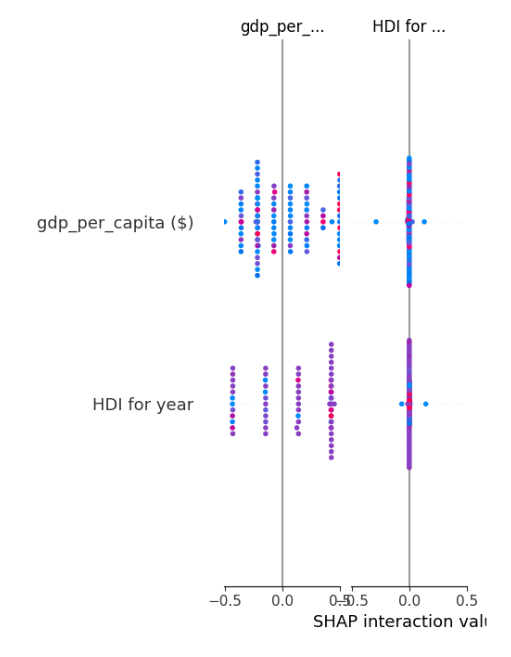

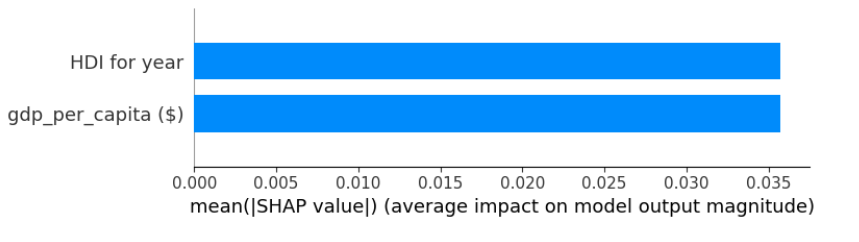

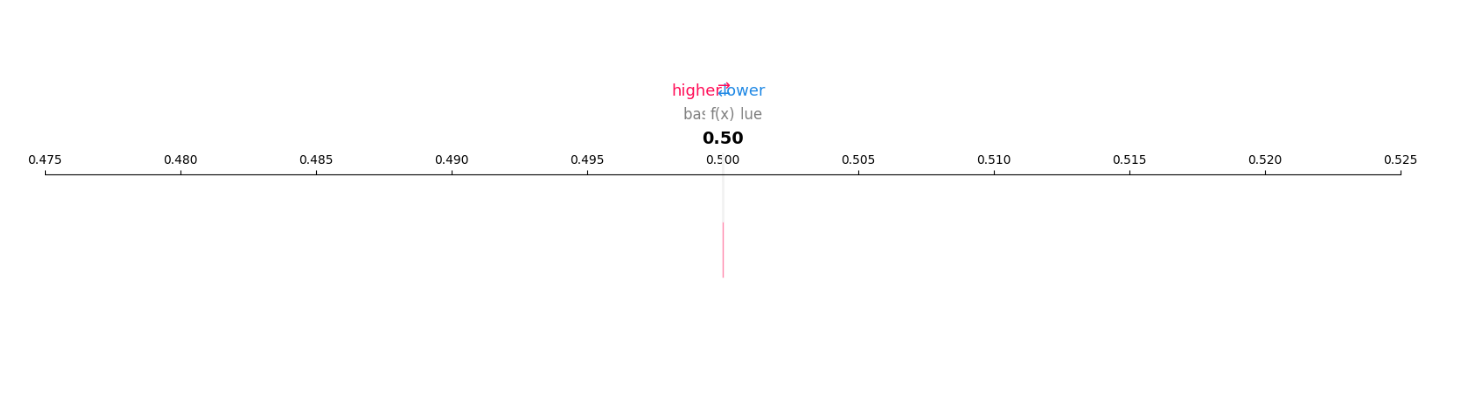